# Tutorial 2: Naive Bayes - Brais Gesto Herrera

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lifesim
from scipy.optimize import curve_fit

bus_read = lifesim.Bus()
bus_read.build_from_config('2a_results.yaml')
bus_read.data.import_catalog(input_path='2a_results_catalog.hdf5')
data = bus_read.data.catalog

## Define useful functions

In [2]:
def get_data(data,bins=20):
    plt.figure(visible=False)
    freq = plt.hist(data,bins,density=True)[0]
    bins = plt.hist(data,bins,density=True)[1]
    plt.close()

    x_bins = []
    for i in range(len(bins)-1):
        x_bins.append(0.5*(bins[i]+bins[i+1]))

    return x_bins, freq

def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

def line(x,a,b):
    return a+b*x

def inv(x,a,b):
    return a/x + b

def fitting(x,y,p0):
    popt, pcov = curve_fit(gauss, x, y,p0)
    a,b,c = popt
    return a,b,c

def plotting(lista,nbins,p0):
    xbins,freq = get_data(lista,nbins)
    plt.figure()
    plt.hist(lista,bins=nbins,density=True)
    plt.plot(xbins,freq,"ko")
    a,b,c = fitting(xbins,freq,p0)
    xteo = np.linspace(min(xbins),max(xbins),1000)
    yteo = gauss(xteo,a,b,c)
    print(a,b,c)
    plt.plot(xteo,yteo)
    plt.show()

def pnormal(x, mean, sd):
    prob_density = np.exp(-0.5*((x-mean)/sd)**2)/(sd*np.sqrt(2*np.pi))
    return prob_density

def get_prob(X,x,habitable,i):
    X0 = X[np.where(habitable==i)]
    mX = sum(X0)/len(X0)
    print(mX)
    print()
    s = np.sqrt(sum((X0-mX)**2)/len(X0))
    p = pnormal(x,mX,s)
    return p

def assign_prob(i,h,x):
    if i == 0:
        if h == 0:
            a,b,c = 0.49409879959176556,1.171576374394258,1.1147359100637682
            return a*np.exp(-(x-b)**2/(2*c**2))
        elif h==1:
            if x>0.5 and x<1.5:
                a,b,c = 1.3155057028171808,-2.9514397310084823,5.3658834893323535
                return a*np.exp(-(x-b)**2/(2*c**2))
            else:
                return 0
    elif i == 1:
        if h == 0:
            a,b,c,d,e = 0.09389411893789743,-0.01673946184237538,0.0007797271359097096,-1.1501768357207729e-05,0.09936651491044324
            return a + b*x + c*x**2+d*x**3 + e/np.sqrt(x)
        elif h == 1:
            a,b,c,d,e = -0.10386192156424057,-0.016278302596550175,0.0016693873392790595,-4.0363731118057154e-05,0.4128072735976502
            return a + b*x + c*x**2+d*x**3 + e/np.sqrt(x)
    elif i == 2:
        if h == 0:
            a,b,c = 0.00264396067463746,183.197572019338,181.2233516476067
            return a*np.exp(-(x-b)**2/(2*c**2))
        elif h == 1:
            a,b,c = 0.010125093609908204,208.15067572847906,40.464679015330866
            return a*np.exp(-(x-b)**2/(2*c**2))

    elif i == 3:
        if h == 0:
            if x>0 and x < 1.4:
                a,b,c,d = 3.8405545192485286,0.2379538277866393,0.06698355802169559,0.2894314134058185
                return a*np.exp(-(x-b)**2/(2*c**2)) + d
            else:
                return 0
        elif h == 1:
            if x>0 and x<1.4:
                a,b,c,d = 4,0.25,0.08,0.2
                return a*np.exp(-(x-b)**2/(2*c**2)) + d
            else:
                return 0
    elif i == 4:
        if h == 0:
            a,b,c,d,e = -8.285522589145915,10.215749846524112,-8.447417049854144,2.720074094641475,3.9571068529064375
            return a + b*x + c*x**2+d*x**3 + e/np.sqrt(x)
        elif h == 1:
            a,b,c,d,e = -11.211469787803187,13.20701859020524,-9.971515590502214,2.917946867674599,5.139856108764568
            return a + b*x + c*x**2+d*x**3 + e/np.sqrt(x)
    elif i == 5:
        if h == 0:
            if x > 2000 and x < 6500:
                a,b,c,d = 0.0016,3000,200,0.0001
                return a*np.exp(-(x-b)**2/(2*c**2)) + d
            else:
                return 0
        elif h == 1:
            if x>2000 and x<6500:
                a,b,c,d = 0.002,3050,180,0.00006
                return a*np.exp(-(x-b)**2/(2*c**2)) + d
            else:
                return 0
    elif i == 6:
        if h == 0:
            a,b,c,d,e,f = 40,0.003,0.007,12,0,0.035
            return a*np.exp(-(x-b)**2/(2*c**2)) + d*np.exp(-(x-e)**2/(2*f**2))
        elif h == 1:
            a,b,c,d,e,f = 42,0.008,0.005,10,0,0.035
            return a*np.exp(-(x-b)**2/(2*c**2)) + d*np.exp(-(x-e)**2/(2*f**2))

def plot_fit(i):
    parameters = ["radius_p","mass_p","temp_p","radius_s","mass_s","temp_s","angsep"]
    list0 = data[parameters[i]].to_numpy()[np.where(habitable==0)]
    list1 = data[parameters[i]].to_numpy()[np.where(habitable==1)]
    
    if i == 0:

        x0 = np.linspace(min(list0),max(list0),1000)
        x1 = np.linspace(0,4,1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of planet radii',fontsize=16)
        ax1.hist(list0,bins=40,density=True)
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=20,density=True)
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 1:

        x0 = np.linspace(0.15,20,1000)
        x1 = np.linspace(0.15,7,1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of planet masses',fontsize=16)
        ax1.hist(list0,bins=40,density=True,range=[0,20])
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=20,density=True,range=[0,7])
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 2:

        x0 = np.linspace(min(list0),1500,1000)
        x1 = np.linspace(min(list1),max(list1),1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of planet temperatures',fontsize=16)
        ax1.hist(list0,bins=50,density=True,range=[0,1500])
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=30,density=True)
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 3:

        x0 = np.linspace(min(list0),max(list0),1000)
        x1 = np.linspace(0,1.4,1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of star radii',fontsize=16)
        ax1.hist(list0,bins=12,density=True)
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=12,density=True)
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 4:

        x0 = np.linspace(0.12,max(list0),1000)
        x1 = np.linspace(0.12,max(list1),1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of star masses',fontsize=16)
        ax1.hist(list0,bins=10,density=True)
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=10,density=True)
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 5:

        x0 = np.linspace(min(list0),max(list0),1000)
        x1 = np.linspace(min(list1),max(list1),1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of star temperatures',fontsize=16)
        ax1.hist(list0,bins=20,density=True)
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=20,density=True)
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

    elif i == 6:

        x0 = np.linspace(0,0.15,1000)
        x1 = np.linspace(0,0.15,1000)
        y0, y1 = [],[]
        
        for t in range(len(x0)):
            y0.append(assign_prob(i,0,x0[t]))
        for t in range(len(x1)):
            y1.append(assign_prob(i,1,x1[t]))
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
        fig.suptitle('Distribution of angular separation',fontsize=16)
        ax1.hist(list0,bins=40,density=True,range=[0,0.15])
        ax1.plot(x0, y0)
        ax1.set_xlabel("Non-habitable planets",fontsize=12)
        ax2.hist(list1,bins=50,density=True,range=[0,0.15])
        ax2.plot(x1, y1)
        ax2.set_xlabel("Habitable planets",fontsize=12)

## Define parameters and fit distributions

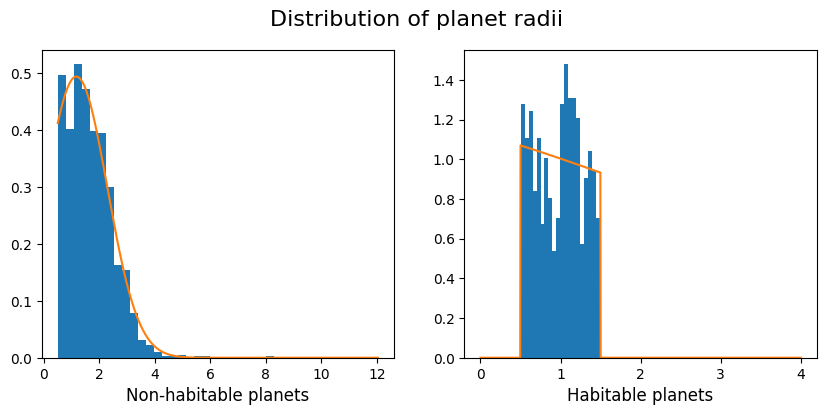

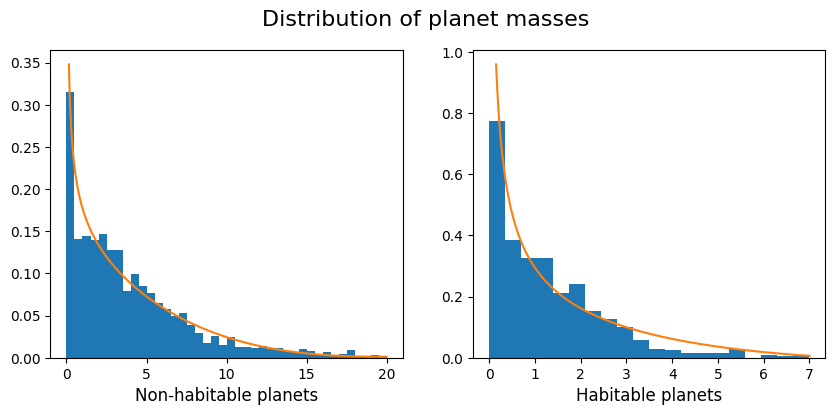

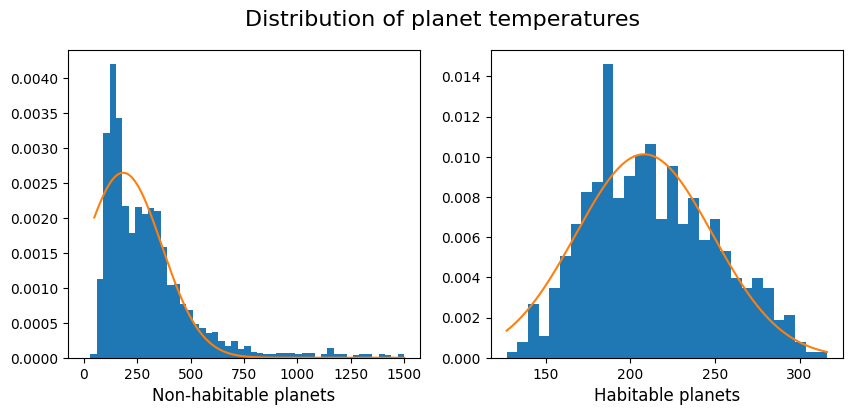

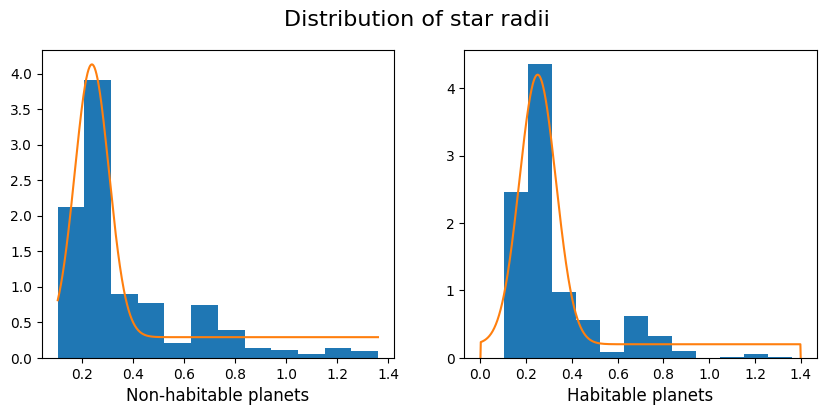

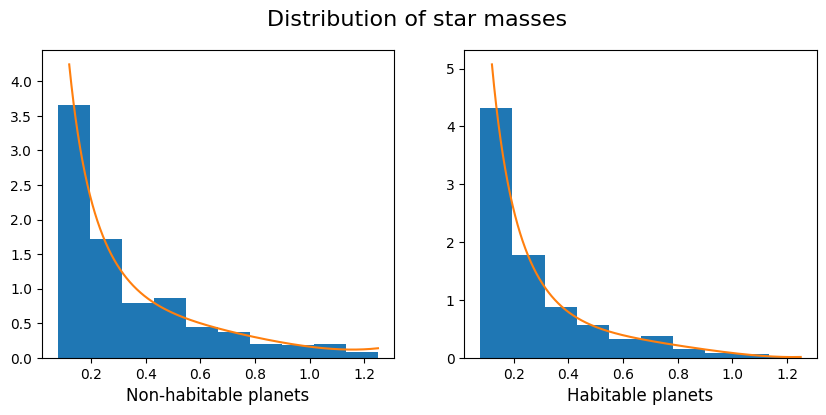

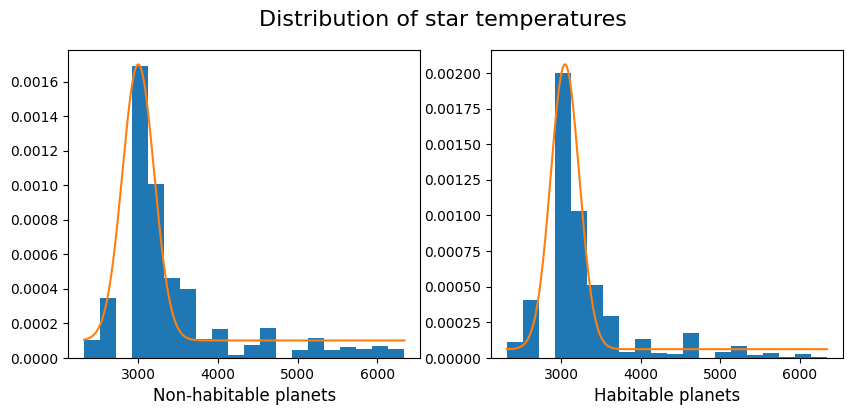

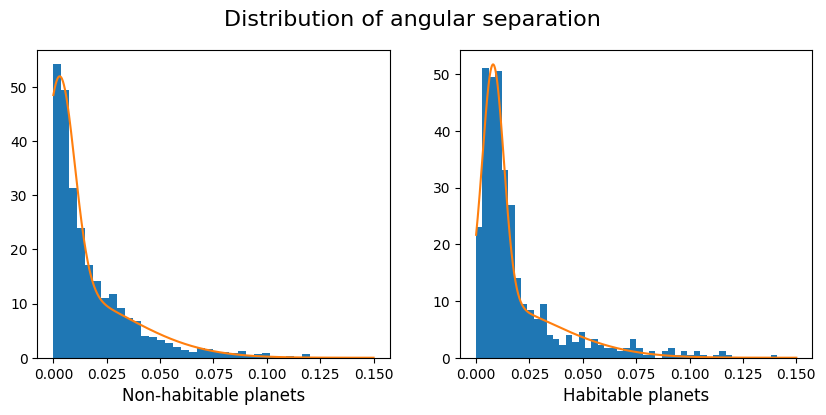

In [3]:
parameters = ["radius_p","mass_p","temp_p","radius_s","mass_s","temp_s","angsep"]
habitable = (data["habitable"]*1).to_numpy()

#I manually fit the probability distributions of these parameters

for i in range(len(parameters)):
    plot_fit(i)

## Make predictions on habitability

In [4]:
# INPUT PARAMETERS

r_p = 1       #Radius of the planet in Earth radii
m_p = 0.5     #Mass of the planet in Earth masses
t_p = 210     #Temperature of the planet in K
r_s = 1       #Radius of the star in Sun radii
m_s = 0.2     #Mass of the star in solar masses
t_s = 3000    #Temperature of the star in K
ang_s = 0.01  #Angular separation between planet and star in arcsec

p_params = [r_p,m_p,t_p,r_s,m_s,t_s,ang_s]

Ph0 = len(habitable[np.where(habitable==0)])/len(habitable) #Counts of non-habitable planets
Ph1 = len(habitable[np.where(habitable==1)])/len(habitable) #Counts of habitable planets

#We calculate the probability that the planet is non-habitable
prob0 = Ph0
for j in range(len(p_params)):
    prob0 = prob0*assign_prob(j,0,p_params[j])

#We calculate the probability that the planet is habitable
prob1 = Ph1
for j in range(len(p_params)):
    prob1 = prob1*assign_prob(j,1,p_params[j])


if prob0 > prob1:
    print("PREDICTION: NON HABITABLE; " + str(int(prob0/(prob1+prob0)*100))+"%")
elif prob1 > prob0:
    print("PREDICTION: HABITABLE; " + str(int(prob1/(prob0+prob1)*100))+"%")
else:
    z = np.random.choice([0,1])
    print("PREDICTION: " + ["HABITABLE","NON HABITABLE"][z] + "; 50%")


PREDICTION: HABITABLE; 80%


## Check efficiency of predictions

In [5]:
counts0 = 0
counts1 = 0
counts = 0

for z in range(len(data["radius_p"])):
    p_params = [data["radius_p"][z],data["mass_p"][z],data["temp_p"][z],data["radius_s"][z],data["mass_s"][z],data["temp_s"][z],data["angsep"][z]]

    #We calculate the probability that the planet is non-habitable
    prob0 = Ph0
    for j in range(len(p_params)):
        prob0 = prob0*assign_prob(j,0,p_params[j])
    
    #We calculate the probability that the planet is habitable
    prob1 = Ph1
    for j in range(len(p_params)):
        prob1 = prob1*assign_prob(j,1,p_params[j])

    if prob0>prob1 and habitable[z]==0:
        counts0 += 1
        counts += 1
    elif prob1>prob0 and habitable[z]==1:
        counts1 += 1
        counts += 1

efficiency = counts/len(habitable)
eff_hab = counts1/len(np.where(habitable==1)[0])
eff_nonhab = counts0/len(np.where(habitable==0)[0])

print("Using this method, %.2f%% of the planets were properly identified."%(100*efficiency))
print("%.2f%% of the habitable planets were identified as such." %(100*eff_hab))
print("%.2f %% of the non-habitable planets were identified as such." %(100*eff_nonhab))

Using this method, 90.17% of the planets were properly identified.
74.37% of the habitable planets were identified as such.
93.43 % of the non-habitable planets were identified as such.
